In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [155]:
train = pd.read_csv('./data/train/train.csv')
train = train.drop('Body ID', axis=1) # remove connection ids
train_count = train.shape[0]
print("Train shape: ", train.shape)
train[:10]

Train shape:  (49972, 3)


,Headline,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Seth Rogen to Play Apple’s Steve Wozniak,discuss,Danny Boyle is directing the untitled film\n\n...
2,Mexico police find mass grave near site 43 stu...,unrelated,Danny Boyle is directing the untitled film\n\n...
3,Mexico Says Missing Students Not Found In Firs...,unrelated,Danny Boyle is directing the untitled film\n\n...
4,New iOS 8 bug can delete all of your iCloud do...,unrelated,Danny Boyle is directing the untitled film\n\n...
5,Return of the Mac: Seth Rogen in talks to star...,discuss,Danny Boyle is directing the untitled film\n\n...
6,Seth Rogen Is Woz,discuss,Danny Boyle is directing the untitled film\n\n...
7,Mexico finds 4 more graves at site of suspecte...,unrelated,Danny Boyle is directing the untitled film\n\n...
8,Are missing students in mass graves found near...,unrelated,Danny Boyle is directing the untitled film\n\n...
9,Mexico prosecutor: Students not in 1st mass gr...,unrelated,Danny Boyle is directing the untitled film\n\n...


In [156]:
train.isnull().sum()

Headline       0
Stance         0
articleBody    0
dtype: int64

## Count of articles in each class

In [157]:
# train[train['Stance'] == "unrelated"]
grouped_by_class = {}
counts = {}

def count_classes(X=train, column='Stance'):
    classes = X[column].unique()
    
    for class_ in classes:
        articles = X[X[column] == class_]
        count = articles.shape[0]
        
        print(class_, count)
        
        counts[class_] = count
        grouped_by_class[class_] = articles
    
count_classes()

unrelated 36545
discuss 8909
agree 3678
disagree 840


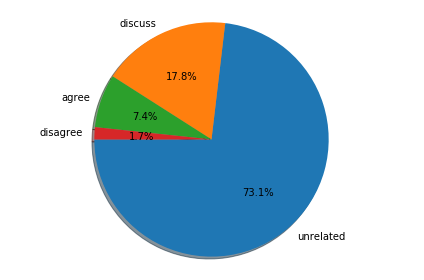

In [158]:
fig1, ax1 = plt.subplots()
ax1.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%',
        shadow=True, startangle=180)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

# Examples from each class

In [159]:
def random_examples(X, num=1):
    count = X.shape[0]
    index = np.random.randint(count)
    return X[index: index + num]

In [160]:
for stance in grouped_by_class.keys():
    print("*****", stance, "*****")
    example = random_examples(grouped_by_class[stance])
    
    print(example['Headline'].item())
    print(example['articleBody'].item())
    
    print()
    print("**************************************************************************")
    print()

***** unrelated *****
Lebanon confirms holding ISIS chief’s kin
There's a story currently making the rounds about an Australian man who, upon returning from a trip to Bali, discovered that a spider burrowed under his skin and traveled up to his chest. Freaky? Yes, but it's also not plausible.

Rest easy, arachnophobes. You do not have to worry about Charlotte weaving her web beneath your flesh. The supposed story goes like this: Dylan Thomas (a 21-year-old man, not the dead poet) was on vacation in Bali and woke up one morning to discover a red "trail" of irritation running from his navel to his chest, a trail that continued to grow longer throughout the day.

Thomas says that, after initially being sent home with antihistamines, he returned to the medical center where doctors discovered a tiny tropical spider beneath his skin. Supposedly, they removed the creature through an incision and placed it in a specimen jar. According to Thomas, his doctors speculated that it had entered his s

## Most common words

In [161]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

def most_common_words(stance, num=25):    
    words = ' '.join(grouped_by_class[stance]['articleBody']).lower().split()
    words_cleaned = [word for word in words if word not in stop]
    return pd.Series(words_cleaned).value_counts()[:num]


In [162]:
for stance in grouped_by_class.keys():
    print('*****', stance, '*****')
    print(most_common_words(stance))
    print()

***** unrelated *****
said         62913
apple        29851
one          28046
would        26452
told         25163
also         24989
new          24198
state        20493
people       20340
could        20256
said.        20007
according    18696
watch        18612
video        18098
islamic      17412
last         17062
—            16703
news         16502
man          16489
isis         16238
first        15890
kim          14749
two          14454
police       14008
time         13915
dtype: int64

***** discuss *****
said          20030
video          7979
islamic        7359
one            7268
state          7162
isis           6928
told           6857
also           6685
would          6404
new            6152
said.          6002
group          5988
u.s.           5564
could          5515
government     5466
according      5454
american       5106
apple          5039
police         5017
two            4859
last           4744
boko           4729
people         4543
man      

# Word counts

In [163]:
def word_count(X=train, col='articleBody'):
    word_counts = list(map(lambda x: len(x), X[col].str.split(' ')))
    return word_counts
    
def plot_counts(counts):
    print('Min Count:', np.min(counts))
    print('Mean Count:', np.mean(counts))
    print('Max Count:', np.max(counts))
    sns.distplot(counts)
    plt.show()

****** unrelated *****
Min Count: 8
Mean Count: 353.8373785743604
Max Count: 2112


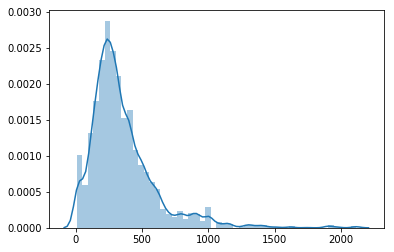


****** discuss *****
Min Count: 8
Mean Count: 391.6171287462117
Max Count: 4655


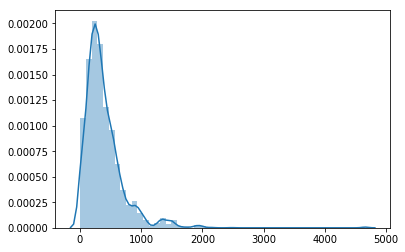


****** agree *****
Min Count: 2
Mean Count: 334.0372485046221
Max Count: 2141


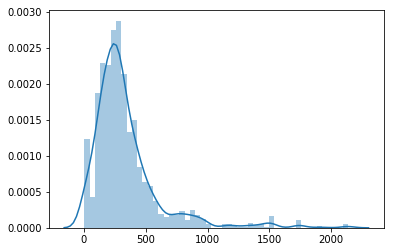


****** disagree *****
Min Count: 9
Mean Count: 360.8654761904762
Max Count: 1491


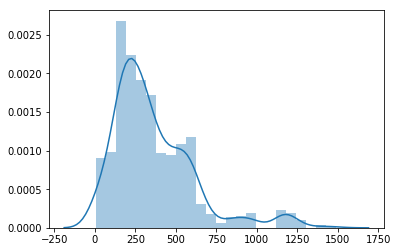


****** Overall *****
Min Count: 2
Mean Count: 359.2335707996478
Max Count: 4655


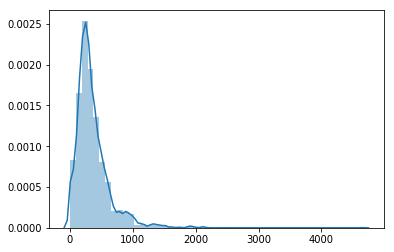

In [164]:
for stance in grouped_by_class.keys():
    print('******', stance, '*****')
    counts = word_count(grouped_by_class[stance])
    plot_counts(counts)
    print()
    
print('****** Overall *****')
counts_overall = word_count(train)
plot_counts(counts_overall)
print()

# Unique articles

In [165]:
train['articleBody'].unique().shape

(1669,)

In [166]:
train['Headline'].unique().shape

(1648,)

In [167]:
train[train['Headline'] == 'Apple Watch Developers Told to Limit Features to Save Battery Life']

,Headline,Stance,articleBody
45264,Apple Watch Developers Told to Limit Features ...,unrelated,Christian Bale will not be playing Steve Jobs ...
47612,Apple Watch Developers Told to Limit Features ...,unrelated,An asteroid about 60 feet in diameter missed h...
49001,Apple Watch Developers Told to Limit Features ...,discuss,Apple is reportedly limiting what Apple Watch ...
49803,Apple Watch Developers Told to Limit Features ...,discuss,"When Apple released the first iPhone, it only ..."
